In [222]:
# first model Logistic regression
# try random forest as well.. --> adjust weights of classes to reflect an equal distribution
# try xgboost

C:\Users\tim94\OneDrive\Dokumente\Universität Bern\Data Analysis and Machine Learning\Project
Path to File: C:\Users\tim94\OneDrive\Dokumente\Universität Bern\Data Analysis and Machine Learning\Project\SAR-221023.csv


In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn.utils import column_or_1d
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import os

path=os.getcwd()
print(path)

path_to_file = os.path.join(path, "SAR-221023.csv")
print("Path to File:", path_to_file)

C:\Users\tim94\OneDrive\Dokumente\Universität Bern\Data Analysis and Machine Learning\Project
Path to File: C:\Users\tim94\OneDrive\Dokumente\Universität Bern\Data Analysis and Machine Learning\Project\SAR-221023.csv


In [2]:
# df = pd.read_csv("C:/Users/tim94/OneDrive/Dokumente/Universität Bern/Data Analysis and Machine Learning/Project/SAR-221023.csv")

# df.head()

# dfclean = df.dropna()

# dfclean.head()

# dfclean.shape

,gender,anshside,language,asa,sgadmsntyp,sginsurance,andiagn_new,anvoropyn,sgaplbrand,dominantside,ansmoking,analcohol,Age,bmi,revisionsurgery,reverse,expectmet24
1073,0.0,1.0,1.0,2.0,1.0,1.0,7.0,0.0,7.0,1.0,0.0,0.0,53.8,35.9,0.0,0.0,5.0
1093,0.0,1.0,1.0,3.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,70.0,40.5,0.0,1.0,10.0
1098,0.0,2.0,1.0,3.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,1.0,75.7,30.8,0.0,1.0,10.0
1099,1.0,2.0,1.0,3.0,1.0,1.0,7.0,1.0,7.0,1.0,0.0,1.0,62.6,39.4,0.0,0.0,10.0
1102,0.0,1.0,3.0,3.0,1.0,1.0,1.0,0.0,6.0,1.0,0.0,0.0,78.8,42.4,0.0,0.0,8.0


array([[<Axes: title={'center': 'expectmet24'}>]], dtype=object)

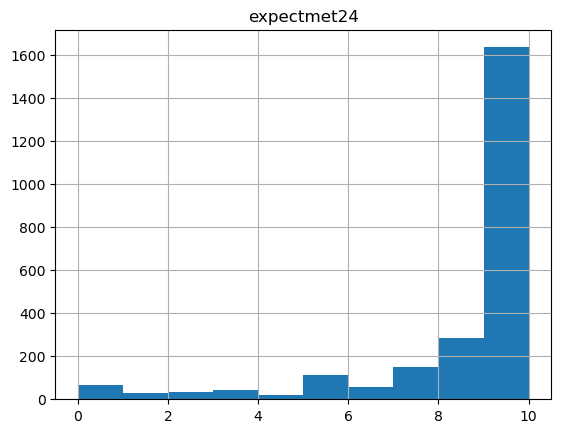

In [316]:
#import and clean dataset
df = pd.read_csv(path_to_file, na_values=('NaN', ''), keep_default_na=False)

df_sat=df[['expectmet24', 'sginsurance', 'andiagn_new', 'gender', 'asa', 'sgadmsntyp', 'revisionsurgery', 'reverse', 'anvoropyn', 'bmi', 'ansmoking', 'Age', 'sgaplbrand', 'language', 'dominantside']]

df_clean=df_sat.drop(df_sat[df_sat['bmi'] > 50].index)

df_cleaned=df_clean.dropna()
# plt.scatter(df_clean['bmi'],df_clean['expectmet24'])

df.hist('expectmet24')

In [323]:
# 1. make train/test split
x=df_cleaned[['gender', 'sginsurance', 'andiagn_new', 'asa', 'sgadmsntyp', 'revisionsurgery', 'reverse', 'anvoropyn', 'bmi', 'ansmoking', 'Age', 'sgaplbrand', 'language', 'dominantside']]
y=df_cleaned[['expectmet24']]
x.shape, y.shape
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


ValueError: No axis named 10 for object type DataFrame

In [212]:
# # 2. fit the model (linear regression model)
# reg = linear_model.LinearRegression()

# reg.fit(x_train, y_train)
# #no sense in plotting a model with 24 parameters...
# plt.scatter(y_train, reg.predict(x_train))
# plt.scatter(y_test, reg.predict(x_test))
# plt.show()


In [275]:
n_train = len(y_train)
n_test = len(y_test)
# convert to numpy array
y_train2= y_train.to_numpy()
x_train2= x_train.to_numpy()
y_test2= y_test.to_numpy()
x_test2= x_test.to_numpy()

# reshape to be able to fit model with sklearn
x_train3 = x_train2.reshape((n_train, -1))
y_train3=y_train2.ravel()
x_test3 = x_test2.reshape((n_test, -1))
y_test3=y_test2.ravel()
print("x_train shape:", x_train3.shape)
print("y_train shape:", y_train3.shape)
print("x_test shape:", x_test3.shape)
print("y_test shape:", y_test3.shape)

# x_train_np = np.array(x_train)
# x_test_np = np.array(x_test)
# y_train_np = np.array(y_train)
# y_test_np = np.array(y_test)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train3)
x_test_scaled = scaler.transform(x_test3)

sns.countplot(x='expectmet24', data=y_train3)

x_train shape: (380, 14)
y_train shape: (380,)
x_test shape: (96, 14)
y_test shape: (96,)


AttributeError: 'numpy.ndarray' object has no attribute 'get'

In [273]:
#logistic regression model
for multi_class in ('multinomial', 'ovr'):
    
# do fit (original model)
#     clf = linear_model.LogisticRegression(solver='sag', max_iter=100,
#                              multi_class='multinomial')

# second model (balanced classes and more iterations)
#     clf = linear_model.LogisticRegression(solver='sag', max_iter=10000,
#                              multi_class='multinomial', class_weight='balanced')

# third model (different solver, with class weights)
    class_weights = {0:10, 1:10, 2:10, 3:10, 4:10, 5:10, 6:10, 7:10, 8:3, 9:2, 10:1}
    clf = linear_model.LogisticRegression(solver='liblinear', max_iter=1000, class_weight=class_weights, multi_class='ovr')
   
    clf.fit(x_train3, y_train3)
# with scaled features
#     clf.fit(x_train_scaled, y_train3)

# print the training scores
    print("training accuracy : %.3f (%s)" % (clf.score(x_train3, y_train3), multi_class))
    print("test accuracy : %.3f (%s)" % (clf.score(x_test3, y_test3), multi_class))

clf.predict(x_train3[0:1])
# y_train3
predictions = clf.predict(x_test3)
cm = metrics.confusion_matrix(y_test3, predictions)
print(cm)
predictions


training accuracy : 0.555 (multinomial)
test accuracy : 0.625 (multinomial)
training accuracy : 0.555 (ovr)
test accuracy : 0.625 (ovr)
[[ 0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  2]
 [ 1  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  1  0  0  1]
 [ 0  0  0  0  0  0  0  0  3]
 [ 0  0  0  1  0  0  0  0  5]
 [ 1  0  0  1  0  1  0  0  9]
 [ 1  0  0  2  0  3  0  0 60]]


array([10., 10.,  5., 10., 10.,  0., 10., 10.,  0., 10., 10., 10., 10.,
        5., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10.,  7.,  5., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10.,  7., 10., 10., 10., 10., 10., 10., 10.,
       10., 10.,  7., 10.,  0., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10.,  7., 10.,  7., 10., 10., 10., 10.,
       10., 10., 10., 10.,  5.])

In [301]:
# Random Forest Model
n_est=4
class_weights = {0:10, 1:10, 2:10, 3:10, 4:10, 5:10, 6:10, 7:10, 8:10, 9:10, 10:1}
clf = RandomForestClassifier(class_weight=class_weights,n_estimators=n_est)
clf.fit(x_train3, y_train3)
print("training score : %.3f (n_est=%d)" % (clf.score(x_train3, y_train3), n_est))


training score : 0.918 (n_est=4)


[0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5]
[10.]
[8.]
[[  9   0   0   0   0   0   0   0   0   1   1]
 [  0   4   0   0   0   0   0   0   1   0   0]
 [  0   0   6   0   0   2   0   0   0   0   1]
 [  0   0   0   3   0   0   0   0   0   1   0]
 [  0   0   0   0   3   0   0   0   0   0   0]
 [  0   0   0   0   0  12   0   0   0   0   0]
 [  0   0   0   0   0   0   5   0   1   0   0]
 [  1   0   0   0   0   0   0  19   0   1   3]
 [  0   0   0   0   0   0   0   0  30   0   3]
 [  0   0   0   0   0   0   0   0   1  28   1]
 [  2   0   0   1   1   2   0   2   3   2 230]]


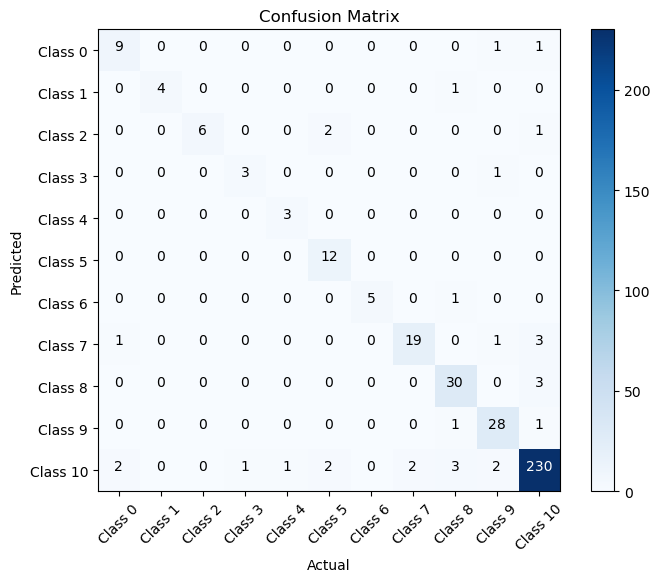

              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78        12
         1.0       0.80      1.00      0.89         4
         2.0       0.67      1.00      0.80         6
         3.0       0.75      0.75      0.75         4
         4.0       1.00      0.75      0.86         4
         5.0       1.00      0.75      0.86        16
         6.0       0.83      1.00      0.91         5
         7.0       0.79      0.90      0.84        21
         8.0       0.91      0.83      0.87        36
         9.0       0.93      0.85      0.89        33
        10.0       0.95      0.96      0.95       239

    accuracy                           0.92       380
   macro avg       0.86      0.87      0.85       380
weighted avg       0.92      0.92      0.92       380



In [314]:
pred_y_train = clf.predict(x_train3)
pred_y_test = clf.predict(x_test3)

#probabilities to belong to each category
pred_y_train_proba = clf.predict_proba(x_train3)
print(pred_y_train_proba[0,:])
#actual first value
print(y_train3[0:1])
#predicted first value
print(pred_y_train[0:1])

# 4. confusion matrix
from sklearn import metrics
conf_matrix=metrics.confusion_matrix(pred_y_train, y_train3)
# conf_matrix=metrics.confusion_matrix(pred_y_test, y_test3)
# metrics.confusion_matrix(pred_y_test, y_test).flatten()

print(conf_matrix)

# Define class labels
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9', 'Class 10']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add values inside the squares
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")
    
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

pred_y_train
print(classification_report(y_train3, pred_y_train))

In [67]:
# 3. evaluate MSE, MAD, and R2 on train and test datasets
print('train mse =', np.std(y_train - reg.predict(x_train)))
print('test mse =', np.std(y_test - reg.predict(x_test)))
# reg.coef_, reg.intercept_
# w, w0 = reg.coef_, reg.intercept_
print('train MAD =', np.median(abs(y_train - reg.predict(x_train))))
print('test MAD =', np.median(abs(y_test - reg.predict(x_test))))
print('train R2 =', reg.score(x_train, y_train))
print('test R2 =', reg.score(x_test, y_test))

train mse = expectmet24    2.511227
dtype: float64
test mse = expectmet24    2.526041
dtype: float64
train MAD = 1.2233611097246975
test MAD = 1.2371307077002136
train R2 = 0.029756062223046498
test R2 = 0.03989754546666735


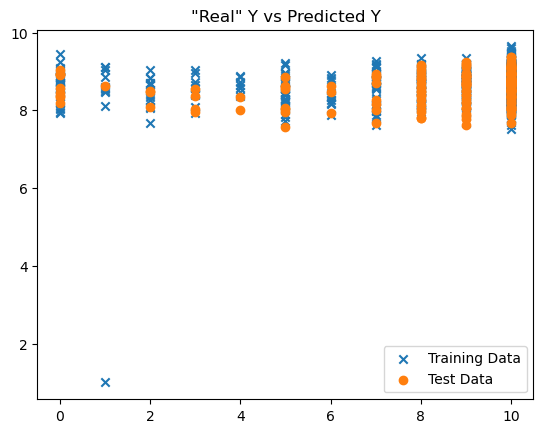

In [66]:
# 4. plot y vs predicted y for test and train parts
plt.scatter(y_train, reg.predict(x_train), marker='x', label='Training Data')
plt.scatter(y_test,reg.predict(x_test), marker='o',label='Test Data')
plt.legend()
plt.title('"Real" Y vs Predicted Y')
plt.show()

In [19]:
# def patient_satisfaction_dataset(return_df=False, return_df_xy=False, price_max=400000, area_max=40000):
#   path = 'path/AmesHousing.csv'
path= path+"\SAR-221023.csv"
print(path)
df = pd.read_csv(path)
#                  , na_values=('NaN', ''), keep_default_na=False)

rename_dict = {k:k.replace(' ', '').replace('/', '') for k in df.keys()}
df.rename(columns=rename_dict, inplace=True)

useful_fields = ['LotArea',
                 'Utilities', 'OverallQual', 'OverallCond',
                 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond',
                 'HeatingQC', 'CentralAir', 'Electrical',
                 '1stFlrSF', '2ndFlrSF','GrLivArea',
                 'FullBath', 'HalfBath',
                 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
                 'Functional','PoolArea',
                 'YrSold', 'MoSold'
                 ]
target_field = 'SalePrice'

df.dropna(axis=0, subset=useful_fields+[target_field], inplace=True)

cleanup_nums = {'Street':      {'Grvl': 0, 'Pave': 1},
                  'LotFrontage': {'NA':0},
                  'Alley':       {'NA':0, 'Grvl': 1, 'Pave': 2},
                  'LotShape':    {'IR3':0, 'IR2': 1, 'IR1': 2, 'Reg':3},
                  'Utilities':   {'ELO':0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3},
                  'LandSlope':   {'Sev':0, 'Mod': 1, 'Gtl': 3},
                  'ExterQual':   {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'ExterCond':   {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'BsmtQual':    {'NA':0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5},
                  'BsmtCond':    {'NA':0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5},
                  'BsmtExposure':{'NA':0, 'No':1, 'Mn': 2, 'Av': 3, 'Gd': 4},
                  'BsmtFinType1':{'NA':0, 'Unf':1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ':5, 'GLQ':6},
                  'BsmtFinType2':{'NA':0, 'Unf':1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ':5, 'GLQ':6},
                  'HeatingQC':   {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'CentralAir':  {'N':0, 'Y': 1},
                  'Electrical':  {'':0, 'NA':0, 'Mix':1, 'FuseP':2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5},
                  'KitchenQual': {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'Functional':  {'Sal':0, 'Sev':1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2':5, 'Min1':6, 'Typ':7},
                  'FireplaceQu': {'NA':0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5},
                  'PoolQC':      {'NA':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'Fence':       {'NA':0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv':4},
                  }

df_X = df[useful_fields].copy()
df_X.replace(cleanup_nums, inplace=True)  # convert continous categorial variables to numerical
df_Y = df[target_field].copy()

x = df_X.to_numpy().astype(np.float32)
y = df_Y.to_numpy().astype(np.float32)

if price_max>0:
  idxs = y<price_max
  x = x[idxs]
  y = y[idxs]

if area_max>0:
  idxs = x[:,0]<area_max
  x = x[idxs]
  y = y[idxs]

return (x, y, df) if return_df else ((x, y, (df_X, df_Y)) if return_df_xy else (x,y))

C:\Users\tim94\OneDrive\Dokumente\Universität Bern\Data Analysis and Machine Learning\Project\SAR-221023.csv


KeyError: ['LotArea', 'Utilities', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'PoolArea', 'YrSold', 'MoSold', 'SalePrice']